In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Load the dataset

In [3]:
train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# Basic EDA

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
train.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
train.shape

(1460, 81)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [12]:
train.isnull().sum()[train.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

<Axes: >

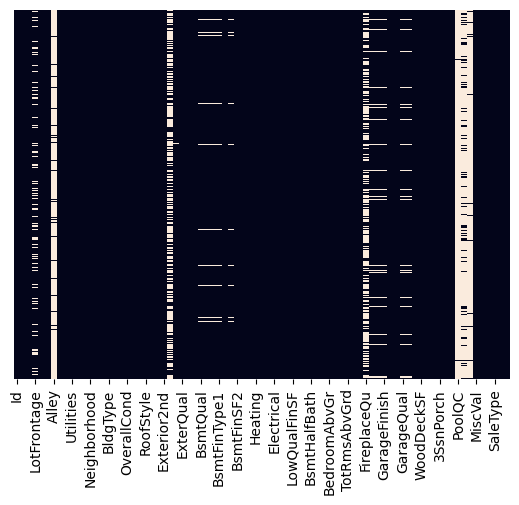

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [14]:
test.isnull().sum()[test.isnull().sum()>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [15]:
train.duplicated().sum() 

0

In [16]:
train.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [17]:
train.select_dtypes(include=['int64', 'float64']).quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0.01,15.59,20.0,21.0,1680.00,3.0,3.0,1899.18,1950.0,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1.0,2006.0,61815.97
0.25,365.75,20.0,59.0,7553.50,5.0,5.0,1954.00,1967.0,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,5.0,2007.0,129975.00
0.50,730.50,50.0,69.0,9478.50,6.0,5.0,1973.00,1994.0,0.00,383.50,...,0.00,25.00,0.00,0.0,0.00,0.0,0.0,6.0,2008.0,163000.00
0.75,1095.25,70.0,80.0,11601.50,7.0,6.0,2000.00,2004.0,166.00,712.25,...,168.00,68.00,0.00,0.0,0.00,0.0,0.0,8.0,2009.0,214000.00
0.99,1445.41,190.0,141.0,37567.64,10.0,9.0,2009.00,2009.0,791.92,1572.41,...,505.46,285.82,261.05,168.0,268.05,0.0,700.0,12.0,2010.0,442567.01


In [18]:
cat_cols = train.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [19]:
train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [20]:
train['SaleType'].nunique()

9

In [21]:
train['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

# Data Cleaning

In [22]:
drop_cols=['Alley','PoolQC','Fence','MiscFeature']
train=train.drop(columns=drop_cols,errors='ignore')
test=test.drop(columns=drop_cols,errors='ignore')

In [23]:
cat_cols = ['GarageFinish', 'GarageQual','GarageCond','GarageType']

for col in cat_cols:
    train[col]=train[col].fillna(train[col].mode()[0])
    test[col]=test[col].fillna(test[col].mode()[0])


In [24]:
num_cols = ['GarageCars', 'GarageArea']

for col in num_cols:
    train[col]=train[col].fillna(train[col].median())
    test[col]=test[col].fillna(test[col].median())


In [25]:
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())
test['GarageYrBlt']=test['GarageYrBlt'].fillna(train['GarageYrBlt'].median())

In [26]:
num_cols=train.select_dtypes(include=['int64','float']).columns
cat_cols = train.select_dtypes(include=['object', 'category']).columns

In [27]:
# Fill categorical columns with mode
for col in cat_cols:
    if train[col].isnull().sum() > 0:  # optional check
        train[col]=train[col].fillna(train[col].mode()[0])

# Fill numeric columns with median
for col in num_cols:
    if train[col].isnull().sum() > 0:  # optional check
        train[col]=train[col].fillna(train[col].median())


In [28]:
# Categorical → mode from train
for col in cat_cols:
    if col in test.columns:  # apply only if column exists in test
        test[col]=test[col].fillna(train[col].mode()[0])

# Numeric → median from train
for col in num_cols:
    if col in test.columns:  # apply only if column exists in test
        test[col]=test[col].fillna(train[col].median())


In [29]:
train.shape

(1460, 77)

In [30]:
train.drop(['Id'],axis=1,inplace=True)
X_ids=test['Id'].copy()
test.drop(['Id'],axis=1,inplace=True)

In [31]:
import pandas as pd

def remove_outliers_iqr_auto(data):
    """
    Removes outliers from all numeric columns in the given DataFrame using the IQR method.
    Works best for training data (don't use on test data).
    """
    data_clean = data.copy()
    numeric_cols = data_clean.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_clean = data_clean[(data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)]

    return data_clean


In [32]:
train = remove_outliers_iqr_auto(train)
train = train.reset_index(drop=True)
print("Before:", train.shape)
print("After:", train.shape)


Before: (548, 76)
After: (548, 76)


# Feature Engineering

In [33]:
def feature_engineering(train, test):
    # ===============================
    # 1️⃣ Numeric feature transformations
    # ===============================
    # Log transform SalePrice (target)
    train['SalePrice_log'] = np.log1p(train['SalePrice'])
    
    # Total square footage
    for df in [train, test]:
        df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    
    # Total bathrooms
    for df in [train, test]:
        df['TotalBath'] = (df['FullBath'] + 0.5*df['HalfBath'] +
                           df['BsmtFullBath'] + 0.5*df['BsmtHalfBath'])
    
    # Age features
    for df in [train, test]:
        df['HouseAge'] = df['YrSold'] - df['YearBuilt']
        df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
    
    # Garage feature interaction
    for df in [train, test]:
        df['GarageScore'] = df['GarageCars'] * df['GarageArea']


In [34]:
# 1. Split target before combining
train['SalePrice_log'] = np.log1p(train['SalePrice'])
y_train = train['SalePrice_log']

# Encoding

In [35]:
# 2. Combine only features (no target)
full = pd.concat([train.drop(['SalePrice','SalePrice_log'], axis=1), test], axis=0)

In [36]:
full.shape

(2007, 75)

In [37]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']
len(columns)

39

In [38]:
# One-hot encoding function 
def category_onehot_multcols(df, multcolumns):
    df_final = df.copy()
    
    for col in multcolumns:
        print(f"Encoding column: {col}")
        # 1. Column ka one-hot bana lo
        dummies = pd.get_dummies(df_final[col], prefix=col, drop_first=True)
        
        # 2. Original column hata do
        df_final.drop(col, axis=1, inplace=True)
        
        # 3. One-hot encoded columns jod do
        df_final = pd.concat([df_final, dummies], axis=1)
    
    return df_final

In [39]:
# One-hot encoding applying
full = category_onehot_multcols(full, columns)

Encoding column: MSZoning
Encoding column: Street
Encoding column: LotShape
Encoding column: LandContour
Encoding column: Utilities
Encoding column: LotConfig
Encoding column: LandSlope
Encoding column: Neighborhood
Encoding column: Condition2
Encoding column: BldgType
Encoding column: Condition1
Encoding column: HouseStyle
Encoding column: SaleType
Encoding column: SaleCondition
Encoding column: ExterCond
Encoding column: ExterQual
Encoding column: Foundation
Encoding column: BsmtQual
Encoding column: BsmtCond
Encoding column: BsmtExposure
Encoding column: BsmtFinType1
Encoding column: BsmtFinType2
Encoding column: RoofStyle
Encoding column: RoofMatl
Encoding column: Exterior1st
Encoding column: Exterior2nd
Encoding column: MasVnrType
Encoding column: Heating
Encoding column: HeatingQC
Encoding column: CentralAir
Encoding column: Electrical
Encoding column: KitchenQual
Encoding column: Functional
Encoding column: FireplaceQu
Encoding column: GarageType
Encoding column: GarageFinish
En

In [40]:
# separate Train aur Test again
train_processed = full.iloc[:train.shape[0], :].copy()
test_processed = full.iloc[train.shape[0]:, :].copy()

print(train_processed.shape, test_processed.shape)

(548, 219) (1459, 219)


In [41]:
full.shape

(2007, 219)

In [42]:
#Import Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
X_tr, X_valid, y_tr, y_valid = train_test_split(train_processed, y_train, test_size=0.2, random_state=42)

In [44]:
# Standard scaling
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_val_scaled = scaler.transform(X_valid)


lin = LinearRegression()

# Fit linear regression
lin.fit(X_tr_scaled, y_tr)
y_pred_lin_log = lin.predict(X_val_scaled)

rmse_val_log = np.sqrt(mean_squared_error(y_valid, y_pred_lin_log))
print("Validation RMSE (log-space):", rmse_val_log)

Validation RMSE (log-space): 65890837436.447205


In [45]:
assert (train_processed.columns == test_processed.columns).all()


In [46]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

In [47]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_tr, y_tr)

RandomForestRegressor(n_estimators=200, random_state=42)

In [48]:
# Predict and evaluate
y_pred = rf.predict(X_valid)
rmse_1 = mean_squared_error(y_valid, y_pred, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: <function rmse at 0x7a1d75307b00>


In [49]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=10)
ridge.fit(X_tr_scaled, y_tr)
y_pred_ridge = ridge.predict(X_val_scaled)
print("Ridge RMSE:",  np.sqrt(mean_squared_error(y_valid, y_pred_ridge)))


Ridge RMSE: 0.10116199990821859


In [50]:
!pip install optuna

In [51]:
import optuna
from sklearn.model_selection import cross_val_score, KFold
import lightgbm as lgb


In [52]:
def objective(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.05),
        "num_leaves": trial.suggest_int("num_leaves", 15,50),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5,30),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "verbosity": -1
    }

    # 5-fold CV
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    model = lgb.LGBMRegressor(**params, n_estimators=1000)
    
    # Early stopping inside cross_val_score is tricky; just use fixed n_estimators
    scores = -cross_val_score(
        model,
        train_processed,
        y_train,
        scoring="neg_root_mean_squared_error",
        cv=kf,
        n_jobs=-1
    )
    
    return scores.mean()

In [53]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-10-21 12:51:56,938] A new study created in memory with name: no-name-1299538c-bc3f-415d-ac8a-ff30d4518c4d


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-10-21 12:53:32,774] Trial 0 finished with value: 0.13187390375930183 and parameters: {'learning_rate': 0.043945831458948856, 'num_leaves': 41, 'max_depth': 3, 'min_child_samples': 14, 'subsample': 0.7935900036727697, 'colsample_bytree': 0.6670274459827112, 'reg_alpha': 3.9600165651959482, 'reg_lambda': 3.347003211840904}. Best is trial 0 with value: 0.13187390375930183.
[I 2025-10-21 12:57:11,792] Trial 1 finished with value: 0.11435107205797457 and parameters: {'learning_rate': 0.041366267171811, 'num_leaves': 32, 'max_depth': 7, 'min_child_samples': 5, 'subsample': 0.66958242971275, 'colsample_bytree': 0.9609626790474501, 'reg_alpha': 0.6116686263036503, 'reg_lambda': 2.069510577330079}. Best is trial 1 with value: 0.11435107205797457.
[I 2025-10-21 13:00:03,645] Trial 2 finished with value: 0.12319028254563791 and parameters: {'learning_rate': 0.030290300296987024, 'num_leaves': 24, 'max_depth': 7, 'min_child_samples': 8, 'subsample': 0.9383247110866254, 'colsample_bytree': 

In [54]:
print("Best RMSE:", study.best_value)
print("Best Parameters:", study.best_params)

Best RMSE: 0.10920759714167567
Best Parameters: {'learning_rate': 0.02027750342046418, 'num_leaves': 15, 'max_depth': 4, 'min_child_samples': 20, 'subsample': 0.6037836331231917, 'colsample_bytree': 0.8820935860213415, 'reg_alpha': 0.12706422216180147, 'reg_lambda': 3.0501088955019906}


In [55]:
best_params = study.best_params
final_model = lgb.LGBMRegressor(**best_params, n_estimators=5000, random_state=42, n_jobs=-1)
final_model.fit(X_tr, y_tr)

# Predict in log-space
y_pred_val_log = final_model.predict(X_valid)

# Compare with original SalePrice
rmse_val = np.sqrt(mean_squared_error(y_valid, y_pred_val_log))
print("Validation RMSE:", rmse_val)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1561
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 91
[LightGBM] [Info] Start training from score 12.041996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [56]:
print("Train shape:", train_processed.shape)
print("Test shape:", test_processed.shape)
print("Columns match:", (train_processed.columns == test_processed.columns).all())
print("Any NaN in test:", test_processed.isnull().sum().sum())


Train shape: (548, 219)
Test shape: (1459, 219)
Columns match: True
Any NaN in test: 0


In [57]:
y_pred_test= np.expm1(final_model.predict(test_processed))
submission = pd.DataFrame({
    "Id": X_ids,
    "SalePrice": y_pred_test
})
submission.to_csv("submission.csv", index=False)